In [ ]:
# !pip install tensorflow-gpu

In [ ]:
pip install bnlp_toolkit

     |████████████████████████████████| 1.1MB 11.8MB/s 
     |████████████████████████████████| 747kB 58.6MB/s 


In [ ]:
# !nvidia-smi

In [ ]:
!pip install BnVec
!git clone https://github.com/banglakit/bengali-stemmer.git
!python -m pip install --upgrade pip
%cd bengali-stemmer
!pip install flake8

#Load Files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from pandas import DataFrame
from BnVec import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()

In [ ]:
data = pd.read_csv('/content/data.csv')
stopwords = pd.read_csv('/content/stopwords_bangla.csv')

In [ ]:
# data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
text = data['Text']
set_stop = set(stopwords['Words'])

In [ ]:
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    # cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned1)
    return cleaned1

In [ ]:
def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    all_negative_words = []
    s=''

    for sentence in data:
        filtered_sentence = []
        for w in str(sentence).split():
            for cleaned_word in clean_punct(w).split():
                if len(cleaned_word)>2:
                   # print(cleaned_word)
                    if((cleaned_word) not in set_stop):
                        # s = stemmer.stem_word(cleaned_word)
                        s = cleaned_word
                        #print(s)
                        if len(s)>2:
                            final_words.append(s)
                            filtered_sentence.append(s)
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string



In [ ]:
import re
re.compile('<title>(.*)</title>')
#text

re.compile(r'<title>(.*)</title>', re.UNICODE)

# **Space Removing**

In [ ]:
ambi_word = list(data['ambiguous_word'])
for word in ambi_word:
  if word == 'কাটা ':
    word = 'কাটা'
  if word == 'কড়া ':
    word = 'কড়া'
  if word == 'বল ':
    word = 'বল'
  

In [ ]:
def unique(list1): 
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    for x in unique_list: 
        print(x),

In [ ]:
#  unique(ambi_word)

In [ ]:
# data['ambiguous_word'].unique()
text = pre_process(text)

In [ ]:
from bnlp import BasicTokenizer

# def listToString(s):  
#     str1 = " " 
#     return (str1.join(s))       
     

basic_t = BasicTokenizer()
raw_text = []
for i in range(len(text)):
  tokens = basic_t.tokenize(text[i])
  raw_text.append(tokens)



punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
text = pre_process(raw_text)
# text

In [ ]:
data['text']= text
data= data.drop(['Text'], axis=1)

# data


**Count Vectorize**

In [ ]:
from pandas import DataFrame
from BnVec import CountVectorizer
cv = CountVectorizer()
x_ambi = cv.fit_transform(ambi_word) # x is the word features
# x_ambi

In [ ]:
text_word = list(data['text'])
x_text = cv.fit_transform(data['text'].values.astype('U'))
# x_text = cv.fit_transform(text_word)
# x_text

In [ ]:
x = np.concatenate((x_text, x_ambi), 1)

In [ ]:
# x

**Vectorization**

In [ ]:
macronum=sorted(set(data['meaning']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def fun(i):
    return macro_to_id[i]

label=data['meaning'].apply(fun)

In [ ]:
y= label
# y

# **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate 
from collections import Counter
from sklearn.metrics import accuracy_score

In [ ]:
# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.2)
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# # fitting the model on crossvalidation train
# knn.fit(X_tr, y_tr)

# # predict the response on the crossvalidation train
# pred = knn.predict(X_cv)

# # evaluate CV accuracy
# acc = accuracy_score(y_cv, pred, normalize=True) * float(100)

In [ ]:
X_tr.shape , y_tr.shape , X_cv.shape , y_cv.shape, X_test.shape , y_test.shape

((2232, 6760), (2232,), (558, 6760), (558,), (310, 6760), (310,))

# **SVM**

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_tr, y_tr)
svm_pred = clf.predict(X_cv)
svm_acc = accuracy_score(y_cv, svm_pred, normalize=True) * float(100)

print('SVM Accuracy %d%%' % (svm_acc)) 

SVM Accuracy 68%


### Cross-validation:

In [ ]:
 from sklearn import svm
 from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=0)
 scores = cross_val_score(clf, X_tr, y_tr, cv=10)
 scores

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.70089286, 0.73214286, 0.71748879, 0.69506726, 0.66367713,
       0.69506726, 0.67264574, 0.7264574 , 0.71748879, 0.69506726])

Mean & standard daviation


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 accuracy with a standard deviation of 0.02


In [ ]:
# from sklearn import metrics
# scores = cross_val_score(clf, x, y, cv=5, scoring='f1_macro')
# scores

In [ ]:
# # import GridSearchCV
# from sklearn.model_selection import GridSearchCV


# # import SVC classifier
# from sklearn.svm import SVC


# # instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
# svc=SVC() 



# # declare parameters for hyperparameter tuning
# parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
#                {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
#                {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
#               ]




# grid_search = GridSearchCV(estimator = svc,  
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 5,
#                            verbose=0)


# grid_search.fit(X_train, y_train)

In [ ]:
# examine the best model


# # best score achieved during the GridSearchCV
# print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# # print parameters that give the best results
# print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# # print estimator that was chosen by the GridSearch
# print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

# **Naive Bayes**

In [ ]:
# fitting the model on crossvalidation train
gnb = GaussianNB()
gnb.fit(X_tr, y_tr)

# predict the response on the crossvalidation train
pred = gnb.predict(X_cv)

# evaluate CV accuracy
acc = accuracy_score(y_cv, pred, normalize=True) * float(100)

print('NAive bayes Accuracy %d%%' % (acc)) 

NAive bayes Accuracy 58%


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
scores = cross_val_score(gnb, X_tr, y_tr, cv=10)
print('Naive Bayes Accuracy is %d%%' % (acc))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
# scores

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Accuracy is 58%
0.64 accuracy with a standard deviation of 0.02


In [ ]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_tr, y_tr)
y_pred = gnb.predict(X_cv)
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_cv, y_pred)))

Model accuracy score: 0.5896


Compare the train-set and test-set accuracy

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_tr, y_tr)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

print('Validation set score: {:.4f}'.format(gnb.score(X_cv, y_cv)))

Training set score: 0.9879
Test set score: 0.5839
Validation set score: 0.5896


In [ ]:

# X_train.shape, X_test.shape

# **KNN**

In [ ]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_tr, y_tr)
# acc = accuracy_score(y_cv, pred, normalize=True) * float(100)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred_train = knn.predict(X_tr)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_tr, y_pred_train)))

Model accuracy score: 0.3871
Training-set accuracy score: 0.6868


In [ ]:
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Test set score: 0.3871


In [ ]:
print('Validationn set score: {:.4f}'.format(knn.score(X_cv, y_cv)))

Validationn set score: 0.3817


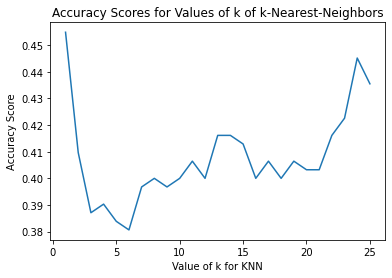

In [ ]:
# experimenting with different n values
from sklearn import metrics
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_tr, y_tr)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

**Simple Cross Validation**

In [ ]:
# # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# myList = list(range(0,50))
# neighbors = list(filter(lambda x: x % 2 != 0, myList))

# cv_scores = []

# # perform 10-fold cross validation
# for k in neighbors:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, x, y, cv=3, scoring='accuracy')
#     cv_scores.append(scores.mean())

# # changing to misclassification error
# MSE = [1 - x for x in cv_scores]

# # determining best k
# optimal_k = neighbors[MSE.index(min(MSE))]
# print('\nThe optimal number of neighbors is %d.' % optimal_k)

# # plot misclassification error vs k 
# plt.plot(neighbors, MSE)

# for xy in zip(neighbors, np.round(MSE,3)):
#     plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

# plt.xlabel('Number of Neighbors K')
# plt.ylabel('Misclassification Error')
# plt.show()

# print("the misclassification error for each k value is : ", np.round(MSE,3))

In [ ]:


for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
# print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 44%

CV accuracy for k = 3 is 38%

CV accuracy for k = 5 is 39%

CV accuracy for k = 7 is 37%

CV accuracy for k = 9 is 37%

CV accuracy for k = 11 is 37%

CV accuracy for k = 13 is 34%

CV accuracy for k = 15 is 35%

CV accuracy for k = 17 is 34%

CV accuracy for k = 19 is 34%

CV accuracy for k = 21 is 34%

CV accuracy for k = 23 is 35%

CV accuracy for k = 25 is 35%

CV accuracy for k = 27 is 34%

CV accuracy for k = 29 is 36%
